In [1]:
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#upload the X and y data of MAI monthly files
input0 = files.upload()
input = pd.read_csv(io.BytesIO(input0['mai_monthly_data_processed.csv']))
output0 = files.upload()
output = pd.read_csv(io.BytesIO(output0['mkt_monthly_data_processed.csv']))
#select the needed features and variable out of the file
X_mai = input.iloc[:,1:9]
y_mai = output.GSPCprem

Saving mai_monthly_data_processed.csv to mai_monthly_data_processed.csv


Saving mkt_monthly_data_processed.csv to mkt_monthly_data_processed.csv


In [8]:
#upload the X and y data of MEF files
input01 = files.upload()
input1 = pd.read_csv(io.BytesIO(input01['mef_monthly_data_processed.csv']))
#select the needed features and variable out of the file
X_mef = input1.iloc[:,1:15]
y_mef = y_mai

Saving mef_monthly_data_processed.csv to mef_monthly_data_processed.csv


In [14]:
#upload the X and y data of MAI daily files
input02 = files.upload()
input2 = pd.read_csv(io.BytesIO(input02['mai_daily_data_processed.csv']))
output02 = files.upload()
output2 = pd.read_csv(io.BytesIO(output02['mkt_daily_data_processed.csv']))
#select the needed features and variable out of the file
X_mai_d = input2.iloc[:,1:9]
y_mkt_d = output2.GSPCprem

Saving mai_daily_data_processed.csv to mai_daily_data_processed.csv


Saving mkt_daily_data_processed.csv to mkt_daily_data_processed.csv


In [3]:
# Function: split data into training and test set based on the random state

def split_data(X, y, test_size, random_state):
    X_train,X_test,y_train,y_test=train_test_split(X_mai,y_mai,test_size=test_size,random_state=random_state)
    return X_train, y_train, X_test, y_test

In [4]:
# Function: build the neural network model

def train_neural_network(X, y):
    """
    Parameters:
    - X: MAI features
    - y: Target variable

    Returns:
    - Trained model
    - Model training history
    """

    # the best number of layers, dropout layers, the best number of units of a layer have been selected
    model = keras.Sequential([
    layers.Dense(64, activation=keras.layers.ELU(),input_dim=8),
    Dropout(0.3),
    layers.Dense(32, activation=keras.layers.ELU()),
    Dropout(0.5),
    layers.Dense(1)  # Output layer with 1 neuron for numerical output
    ])

    # Compile the model
    # the best optimizer and learning rate have been selected
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    # the best number of epochs and batch_size have been selected
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Plot training and validation accuracy over epochs
    plt.plot(history.history['loss'], label='Training MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model, history

In [5]:
#Function: evaluate the performance of the model and show the values in plot
def test_model(model, X_test, y_test):
    """
    Test a trained model and calculate regression metrics.

    Parameters:
    - model: Trained model
    - X_test: Testing features
    - y_test: True values for testing

    Returns:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R-squared (R2) score
    """

    # Make y_pred using the trained model
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Plot predicted values and true values

    new_y_test = [value for index, value in enumerate(y_test)]
    plt.plot(new_y_test, label='True',color='blue')
    plt.plot(y_pred, label='Prediction',color='red')

    plt.xlabel('Index')
    plt.ylabel('y values')
    plt.title('True vs Pred')

    plt.legend()

    plt.show()

    return MSE, MAE, R2

Epoch 1/10
9/9 [==============================] - 4s 94ms/step - loss: 1256.8879 - mae: 27.3363 - val_loss: 1775.4728 - val_mae: 28.7759
Epoch 2/10
9/9 [==============================] - 0s 23ms/step - loss: 1246.9509 - mae: 27.2036 - val_loss: 1775.6433 - val_mae: 28.7755
Epoch 3/10
9/9 [==============================] - 0s 27ms/step - loss: 1252.9441 - mae: 27.2350 - val_loss: 1775.9408 - val_mae: 28.7750
Epoch 4/10
9/9 [==============================] - 0s 24ms/step - loss: 1248.6252 - mae: 27.1769 - val_loss: 1776.2273 - val_mae: 28.7745
Epoch 5/10
9/9 [==============================] - 0s 36ms/step - loss: 1246.7418 - mae: 27.1946 - val_loss: 1776.5588 - val_mae: 28.7758
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1244.1218 - mae: 27.1062 - val_loss: 1776.6814 - val_mae: 28.7762
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1259.2827 - mae: 27.2884 - val_loss: 1776.9161 - val_mae: 28.7771
Epoch 8/10
9/9 [=========================

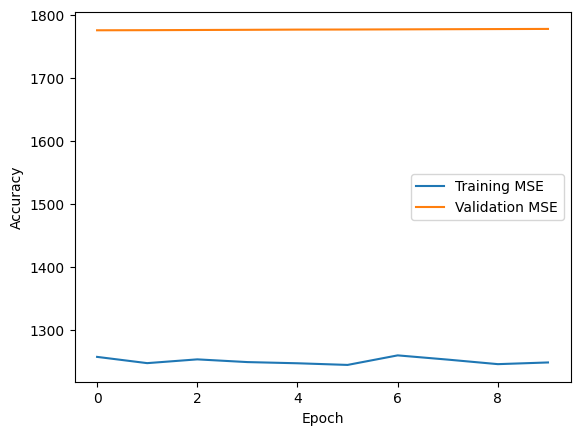

3/3 [==============================] - 0s 8ms/step


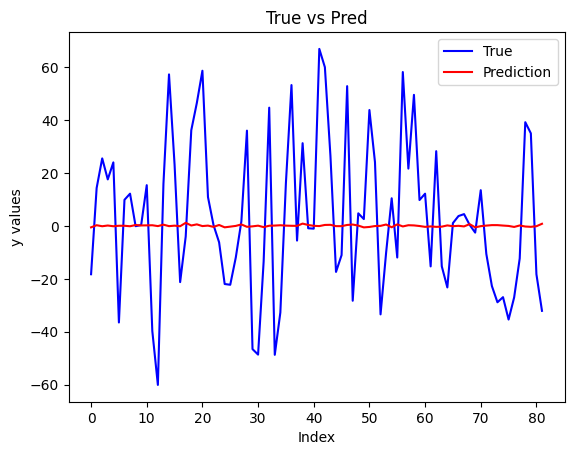

MSE: 869.621378669986, MAE: 23.731364053085134, R2: -0.015435833246305597


In [6]:
# Train a model on MAI monthly data
# Generate training and test data sets
X_train, y_train, X_test, y_test = split_data(X_mai, y_mai, 0.2, 0)

# Use X_train and y_train as MAI features and target variable
trained_model, training_history = train_neural_network(X_train, y_train)

# Have the performance of the trained model evaluated on the test set
MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
print(f'MSE: {MSE}, MAE: {MAE}, R2: {R2}')

Epoch 1/10
9/9 [==============================] - 1s 39ms/step - loss: 1254.8711 - mae: 27.0678 - val_loss: 1771.0435 - val_mae: 28.6979
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1243.7976 - mae: 27.0008 - val_loss: 1771.4552 - val_mae: 28.6950
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 1247.0127 - mae: 26.9888 - val_loss: 1771.8707 - val_mae: 28.6929
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 1255.8530 - mae: 27.0719 - val_loss: 1772.2623 - val_mae: 28.6947
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 1246.9823 - mae: 26.9016 - val_loss: 1772.6334 - val_mae: 28.6968
Epoch 6/10
9/9 [==============================] - 0s 11ms/step - loss: 1251.8174 - mae: 27.0385 - val_loss: 1773.0699 - val_mae: 28.6994
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1234.8926 - mae: 26.7565 - val_loss: 1773.5033 - val_mae: 28.7013
Epoch 8/10
9/9 [==========================

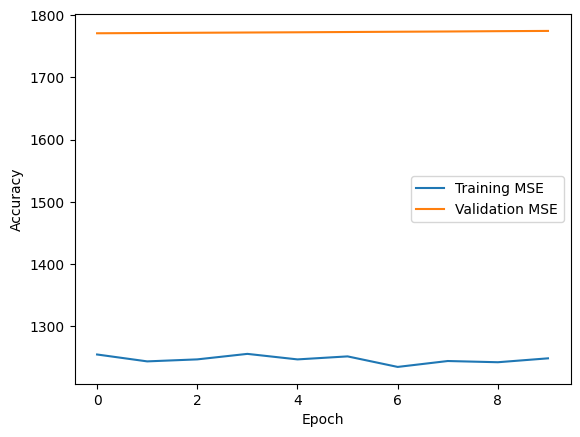

3/3 [==============================] - 0s 4ms/step


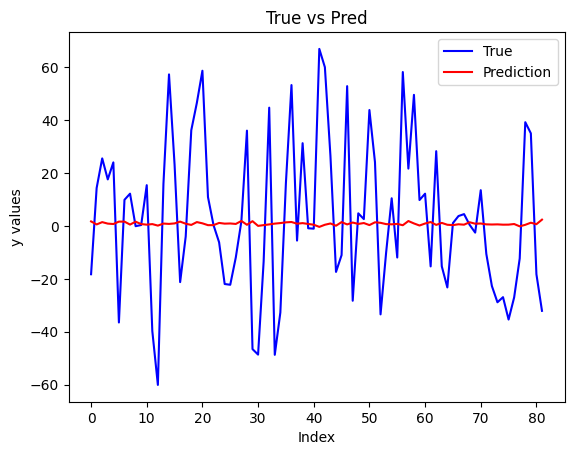

MSE: 868.0482829972293, MAE: 23.72578343590969, R2: -0.013598967508615223
Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 1328.1230 - mae: 26.4857 - val_loss: 870.5366 - val_mae: 24.1962
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1330.0526 - mae: 26.6197 - val_loss: 870.5791 - val_mae: 24.1982
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1329.4435 - mae: 26.4444 - val_loss: 870.6260 - val_mae: 24.2003
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1322.2389 - mae: 26.3783 - val_loss: 870.7250 - val_mae: 24.2038
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 1319.9944 - mae: 26.3555 - val_loss: 870.8049 - val_mae: 24.2063
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1315.8796 - mae: 26.3191 - val_loss: 870.9426 - val_mae: 24.2094
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1316.3199 - mae: 26.3782 - val_loss: 871.0831

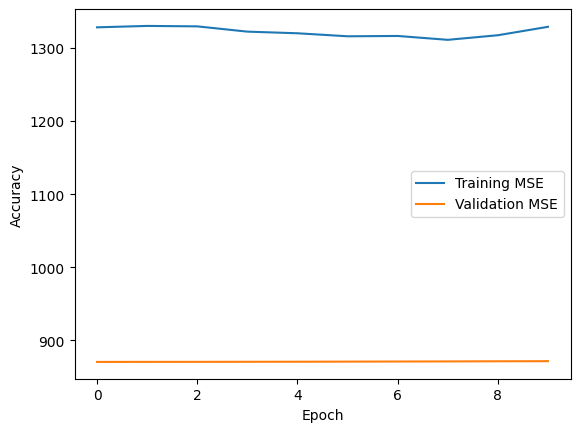

3/3 [==============================] - 0s 4ms/step


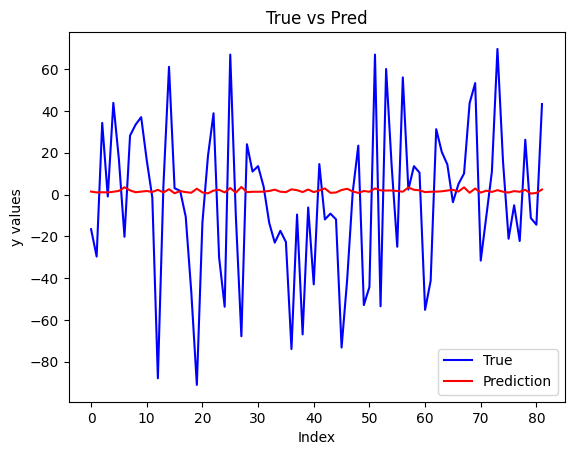

MSE: 1347.3673338271021, MAE: 28.788668571543496, R2: -0.014956858810354356
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 1043.8676 - mae: 24.2176 - val_loss: 1369.9885 - val_mae: 27.5858
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 1042.6395 - mae: 24.2105 - val_loss: 1370.4623 - val_mae: 27.5717
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1032.6121 - mae: 24.0097 - val_loss: 1370.8715 - val_mae: 27.5602
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 1039.6708 - mae: 24.1732 - val_loss: 1371.4720 - val_mae: 27.5460
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 1040.7186 - mae: 24.1269 - val_loss: 1371.9341 - val_mae: 27.5364
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 1045.5375 - mae: 24.1198 - val_loss: 1372.4368 - val_mae: 27.5264
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 1040.8004 - mae: 24.1179 - val_loss: 

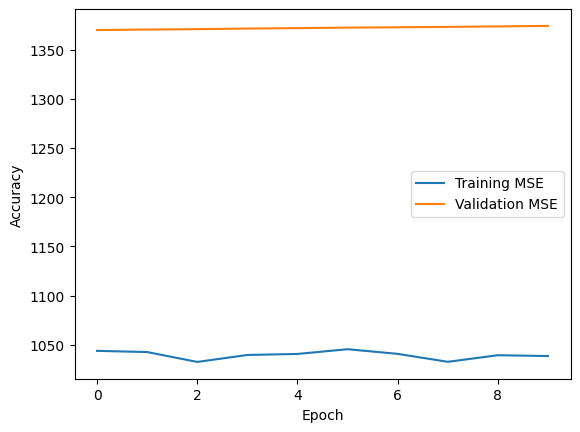

3/3 [==============================] - 0s 4ms/step


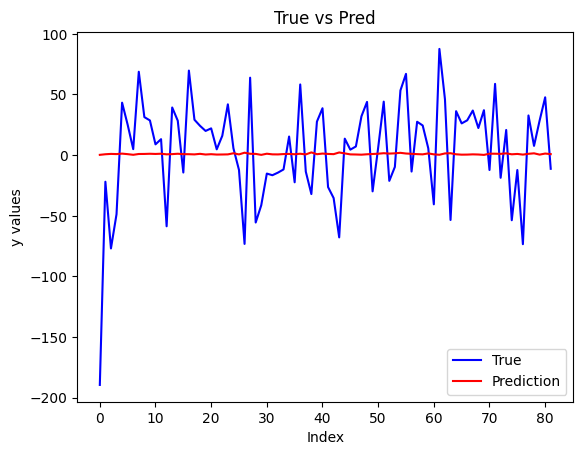

MSE: 1840.6977196884025, MAE: 33.63275788777162, R2: -0.007456724809009385
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1343.4294 - mae: 26.8826 - val_loss: 1097.2164 - val_mae: 26.1743
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 1344.7795 - mae: 26.8966 - val_loss: 1096.6388 - val_mae: 26.1529
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 1350.2261 - mae: 26.9300 - val_loss: 1096.0100 - val_mae: 26.1286
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1354.0940 - mae: 26.9543 - val_loss: 1095.5852 - val_mae: 26.1123
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 1349.6227 - mae: 26.8746 - val_loss: 1094.9135 - val_mae: 26.0883
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1338.2402 - mae: 26.7272 - val_loss: 1094.5936 - val_mae: 26.0775
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 1350.9788 - mae: 26.8598 - val_loss: 1

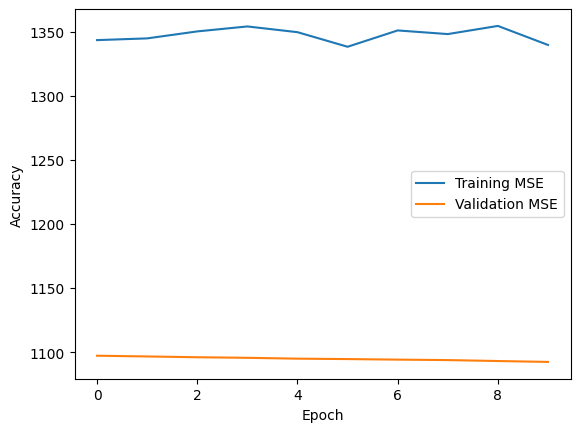

3/3 [==============================] - 0s 5ms/step


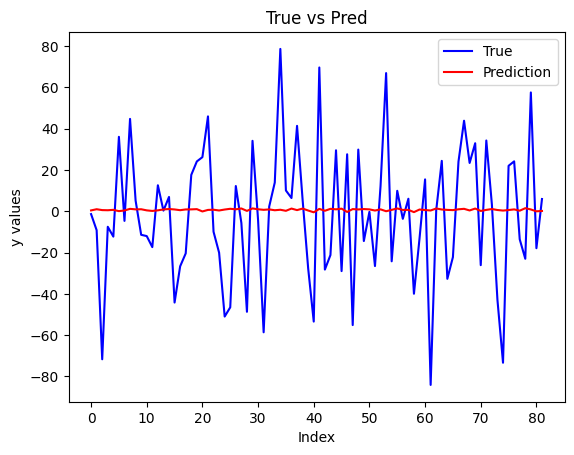

MSE: 1089.6819742879754, MAE: 26.13710175033835, R2: -0.002306188419964883
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1374.5315 - mae: 28.1350 - val_loss: 1179.8290 - val_mae: 26.3152
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 1383.2502 - mae: 28.1698 - val_loss: 1179.5729 - val_mae: 26.3107
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1371.0586 - mae: 28.0959 - val_loss: 1179.1960 - val_mae: 26.3043
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 1368.2716 - mae: 28.0290 - val_loss: 1178.4706 - val_mae: 26.2906
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 1367.7484 - mae: 27.9279 - val_loss: 1177.8076 - val_mae: 26.2781
Epoch 6/10
9/9 [==============================] - 0s 11ms/step - loss: 1358.3407 - mae: 27.9191 - val_loss: 1177.2513 - val_mae: 26.2675
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1364.5548 - mae: 27.9396 - val_los

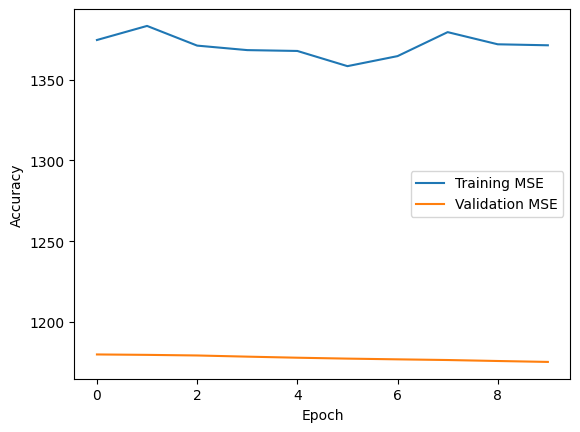

3/3 [==============================] - 0s 4ms/step


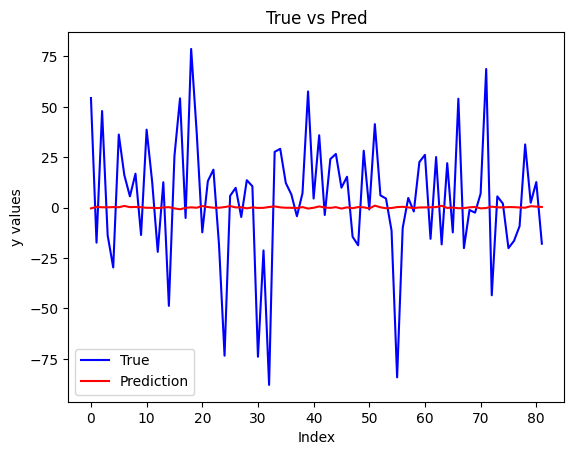

MSE: 965.7225344111758, MAE: 23.151998667257445, R2: -0.024027409927471988
Epoch 1/10
9/9 [==============================] - 1s 37ms/step - loss: 1310.8636 - mae: 26.4254 - val_loss: 840.6041 - val_mae: 22.1917
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 1321.0181 - mae: 26.6779 - val_loss: 840.4962 - val_mae: 22.1787
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1312.6461 - mae: 26.4999 - val_loss: 840.3804 - val_mae: 22.1642
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 1319.3561 - mae: 26.5288 - val_loss: 840.3050 - val_mae: 22.1535
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1328.9813 - mae: 26.7272 - val_loss: 840.2410 - val_mae: 22.1417
Epoch 6/10
9/9 [==============================] - 0s 19ms/step - loss: 1324.5321 - mae: 26.5962 - val_loss: 840.1995 - val_mae: 22.1362
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1316.3147 - mae: 26.5628 - val_loss: 84

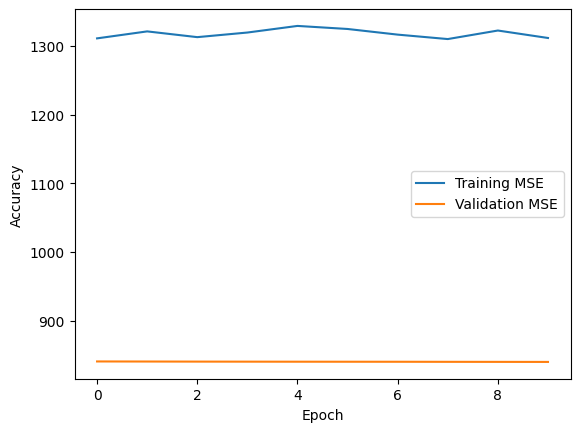

3/3 [==============================] - 0s 5ms/step


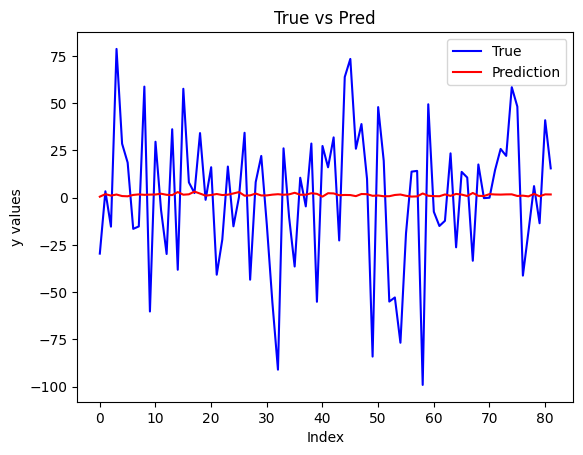

MSE: 1381.4742448313543, MAE: 29.523786326256875, R2: -0.003917870249065425
Epoch 1/10
9/9 [==============================] - 1s 30ms/step - loss: 1107.7141 - mae: 25.7249 - val_loss: 1323.0428 - val_mae: 27.6318
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 1112.8971 - mae: 25.7060 - val_loss: 1322.3282 - val_mae: 27.6111
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1098.3043 - mae: 25.5994 - val_loss: 1321.5273 - val_mae: 27.5890
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 1106.7050 - mae: 25.7018 - val_loss: 1320.7344 - val_mae: 27.5666
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1103.4275 - mae: 25.6175 - val_loss: 1320.0624 - val_mae: 27.5469
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1100.6960 - mae: 25.5462 - val_loss: 1319.5051 - val_mae: 27.5295
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1107.5586 - mae: 25.5684 - val_l

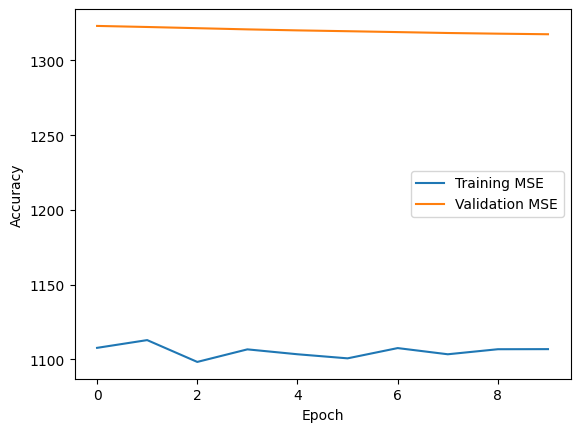

3/3 [==============================] - 0s 5ms/step


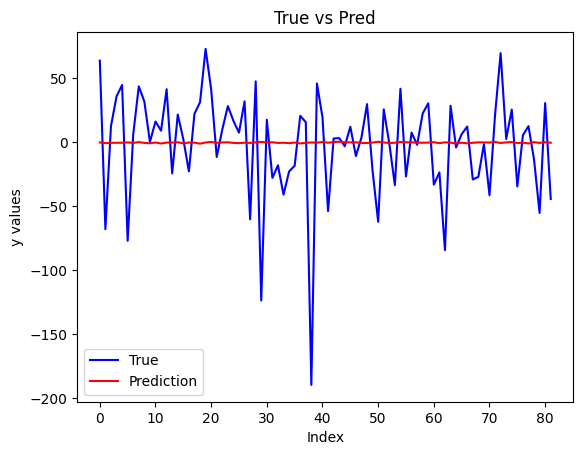

MSE: 1712.967530218518, MAE: 30.11652211279274, R2: -0.002716919240409732
Epoch 1/10
9/9 [==============================] - 1s 29ms/step - loss: 1101.9800 - mae: 25.1394 - val_loss: 1598.7898 - val_mae: 31.4502
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1108.9315 - mae: 25.2905 - val_loss: 1598.1862 - val_mae: 31.4346
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1112.4087 - mae: 25.2999 - val_loss: 1597.4700 - val_mae: 31.4165
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1107.0842 - mae: 25.1460 - val_loss: 1596.9513 - val_mae: 31.4034
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1100.5742 - mae: 25.1003 - val_loss: 1596.3292 - val_mae: 31.3870
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1111.9661 - mae: 25.2051 - val_loss: 1595.7771 - val_mae: 31.3722
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1106.9081 - mae: 25.1295 - val_loss:

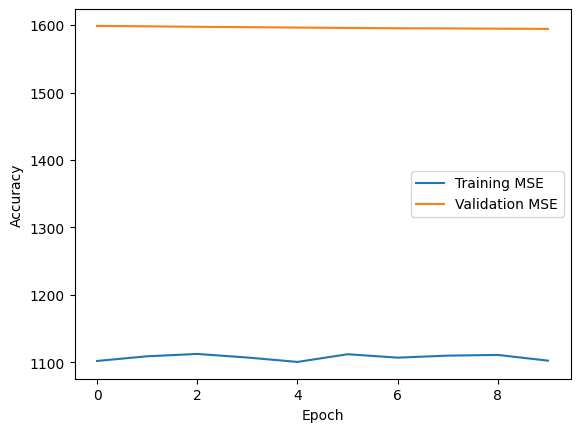

3/3 [==============================] - 0s 5ms/step


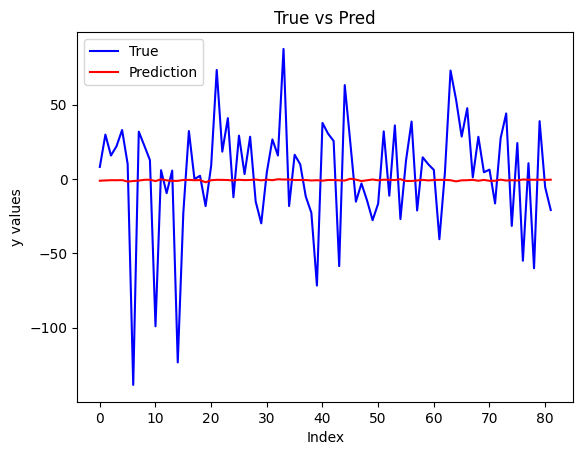

MSE: 1487.4151936162725, MAE: 28.72674854947367, R2: -0.011096806063364717
Epoch 1/10
9/9 [==============================] - 1s 28ms/step - loss: 1323.1981 - mae: 27.2693 - val_loss: 1024.2797 - val_mae: 24.6437
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 1337.8265 - mae: 27.3455 - val_loss: 1024.1390 - val_mae: 24.6397
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1320.9237 - mae: 27.1854 - val_loss: 1023.5981 - val_mae: 24.6264
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 1324.3535 - mae: 27.2436 - val_loss: 1023.3154 - val_mae: 24.6194
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1340.5123 - mae: 27.3163 - val_loss: 1023.0425 - val_mae: 24.6124
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1328.8945 - mae: 27.3082 - val_loss: 1022.8546 - val_mae: 24.6069
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 1345.7146 - mae: 27.4826 - val_loss:

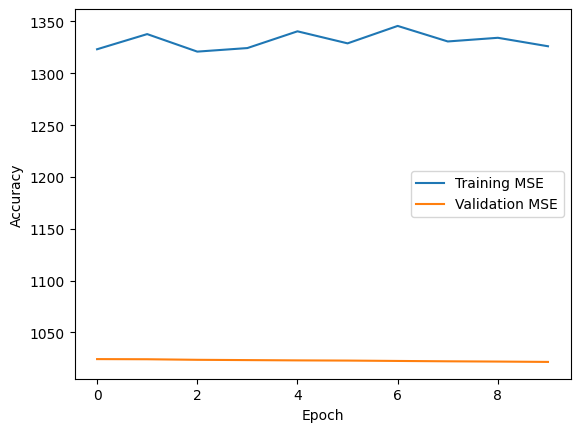

3/3 [==============================] - 0s 4ms/step


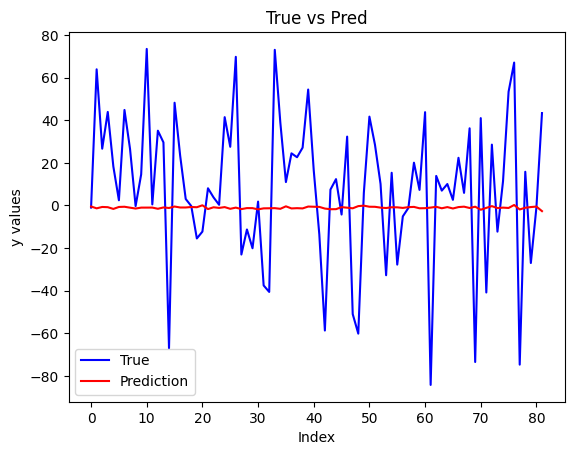

MSE: 1258.6890546428876, MAE: 27.89131104613155, R2: -0.06914787308042891
Epoch 1/10
9/9 [==============================] - 1s 41ms/step - loss: 1246.7399 - mae: 26.9916 - val_loss: 1013.7171 - val_mae: 26.1112
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 1255.0986 - mae: 27.0400 - val_loss: 1013.4686 - val_mae: 26.1065
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 1251.6991 - mae: 27.0620 - val_loss: 1013.1823 - val_mae: 26.1014
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 1255.9167 - mae: 26.9706 - val_loss: 1012.8030 - val_mae: 26.0939
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 1253.6783 - mae: 27.0106 - val_loss: 1012.5785 - val_mae: 26.0898
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1264.4425 - mae: 27.1533 - val_loss: 1012.2829 - val_mae: 26.0842
Epoch 7/10
9/9 [==============================] - 0s 14ms/step - loss: 1254.1525 - mae: 27.0626 - val_lo

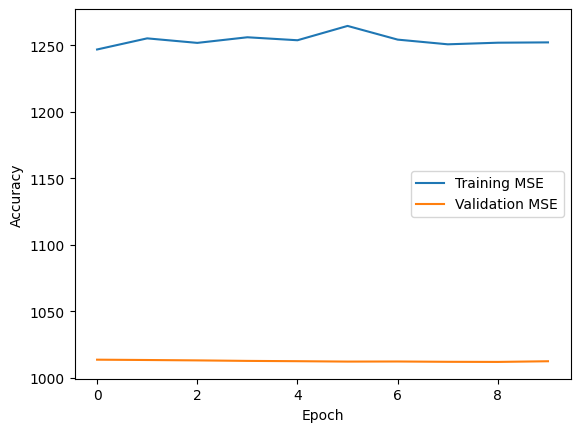

3/3 [==============================] - 0s 4ms/step


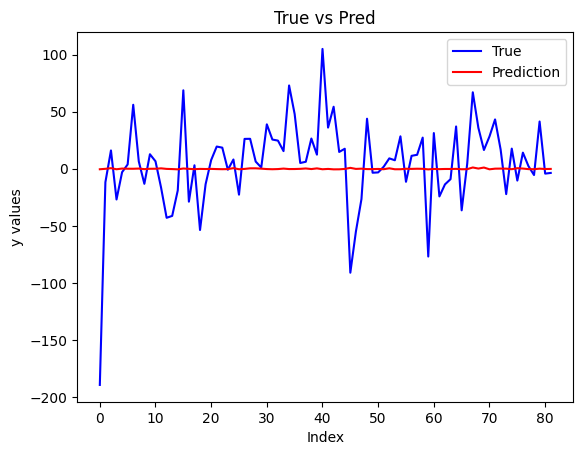

MSE: 1486.1341118035934, MAE: 26.417522823120613, R2: -0.015734235012757614
The average RMSE is 36.43105635499048


In [43]:
# Test the performance of the model using 10 different random splits of training and test set of MAI monthly data
list_RMSE=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mai, y_mai, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history = train_neural_network(X_train, y_train)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'MSE: {MSE}, MAE: {MAE}, R2: {R2}')
  list_RMSE.append(MSE**(1/2))
avg_RMSE=np.mean(list_RMSE)
print('The average RMSE is', avg_RMSE)

The standard variation of RMSE is 4.074055828281947


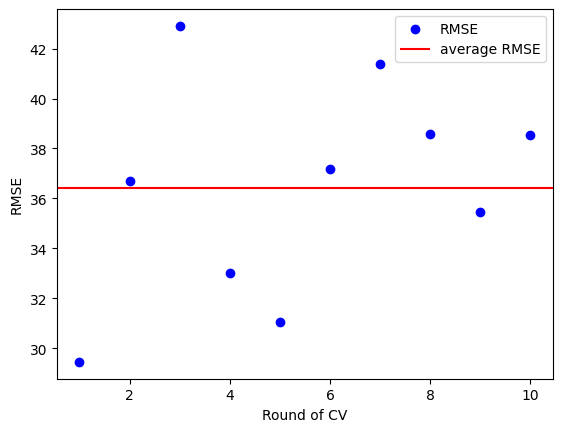

In [44]:
# Calculate the standard variation of RMSE
print('The standard variation of RMSE is', np.std(list_RMSE))
# Plot the RMSE of each round of random split
plt.scatter(y=list_RMSE,x=range(1,11),label='RMSE',color='blue')
plt.axhline(y=avg_RMSE, label='average RMSE',linestyle='-',color='red')

plt.xlabel('Round of CV')
plt.ylabel('RMSE')
#plt.title('RMSE of each round of random split, NN on MAI monthly')

plt.legend()

plt.show()

Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 1250.4067 - mae: 27.1256 - val_loss: 1766.5488 - val_mae: 28.7236
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 1247.5355 - mae: 27.0633 - val_loss: 1767.0420 - val_mae: 28.7232
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 1243.5424 - mae: 27.0448 - val_loss: 1767.4784 - val_mae: 28.7229
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 1247.2758 - mae: 27.0340 - val_loss: 1768.0071 - val_mae: 28.7252
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 1239.4758 - mae: 26.9810 - val_loss: 1768.4545 - val_mae: 28.7275
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 1244.9036 - mae: 27.0087 - val_loss: 1768.7095 - val_mae: 28.7295
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 1242.3922 - mae: 27.0672 - val_loss: 1768.8698 - val_mae: 28.7307
Epoch 8/10
9/9 [==============================

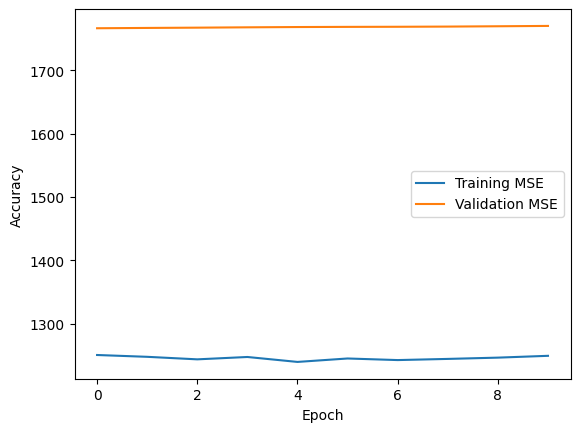

3/3 [==============================] - 0s 4ms/step


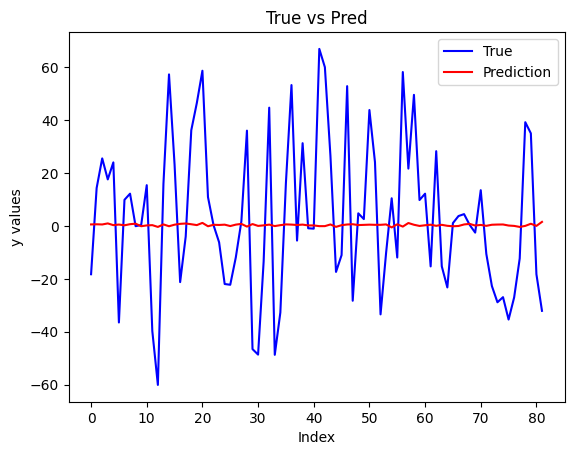

MSE: 866.7377650592189, MAE: 23.69305741780461, R2: -0.012068707435659132
Epoch 1/10
9/9 [==============================] - 1s 29ms/step - loss: 1324.9279 - mae: 26.5075 - val_loss: 869.4230 - val_mae: 24.1539
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1325.3917 - mae: 26.5145 - val_loss: 869.5429 - val_mae: 24.1572
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 1322.3092 - mae: 26.3697 - val_loss: 869.6116 - val_mae: 24.1594
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1320.6953 - mae: 26.4555 - val_loss: 869.6877 - val_mae: 24.1615
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 1317.9683 - mae: 26.2770 - val_loss: 869.7747 - val_mae: 24.1635
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 1317.3955 - mae: 26.3156 - val_loss: 869.8906 - val_mae: 24.1657
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1318.6758 - mae: 26.2466 - val_loss: 870.0745

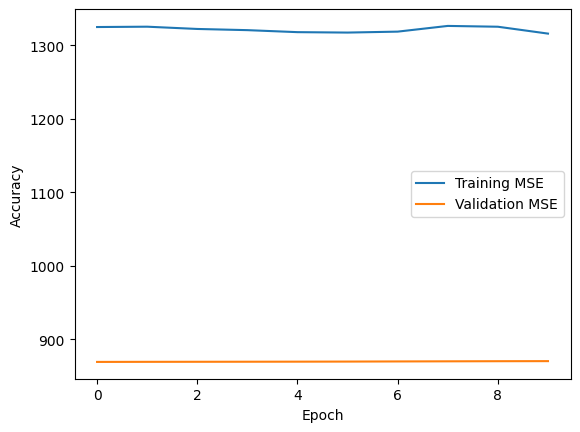

3/3 [==============================] - 0s 5ms/step


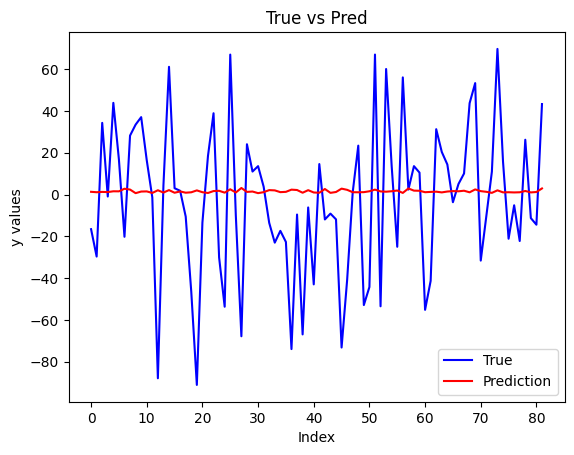

MSE: 1348.1882094817543, MAE: 28.830778673385794, R2: -0.015575215330511982
Epoch 1/10
9/9 [==============================] - 1s 27ms/step - loss: 1033.2227 - mae: 23.8935 - val_loss: 1374.1669 - val_mae: 27.3816
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1041.0543 - mae: 24.0536 - val_loss: 1374.4390 - val_mae: 27.3801
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1041.5789 - mae: 24.0540 - val_loss: 1374.5903 - val_mae: 27.3799
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 1039.7043 - mae: 24.0358 - val_loss: 1374.8564 - val_mae: 27.3772
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 1030.6655 - mae: 23.9057 - val_loss: 1374.9988 - val_mae: 27.3763
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1031.8124 - mae: 23.9569 - val_loss: 1375.3855 - val_mae: 27.3716
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1034.1801 - mae: 24.0326 - val_loss:

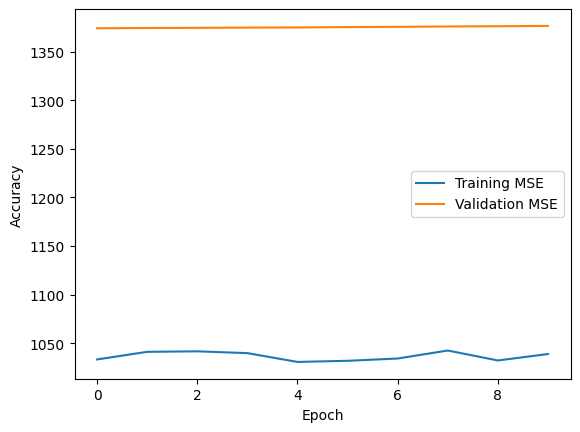

3/3 [==============================] - 0s 5ms/step


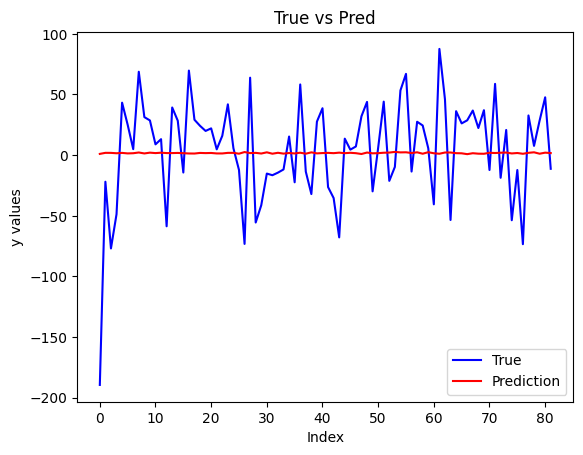

MSE: 1833.4436636035596, MAE: 33.441162959632024, R2: -0.0034864109944989785
Epoch 1/10
9/9 [==============================] - 1s 32ms/step - loss: 1347.9883 - mae: 27.0727 - val_loss: 1102.5884 - val_mae: 26.4604
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1352.7936 - mae: 27.1504 - val_loss: 1101.7740 - val_mae: 26.4377
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 1360.3114 - mae: 27.1927 - val_loss: 1101.0159 - val_mae: 26.4166
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1366.3296 - mae: 27.1252 - val_loss: 1100.4932 - val_mae: 26.4024
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1363.4741 - mae: 27.2471 - val_loss: 1099.6886 - val_mae: 26.3805
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1357.5516 - mae: 27.2323 - val_loss: 1098.9606 - val_mae: 26.3593
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1357.4000 - mae: 27.1003 - val_l

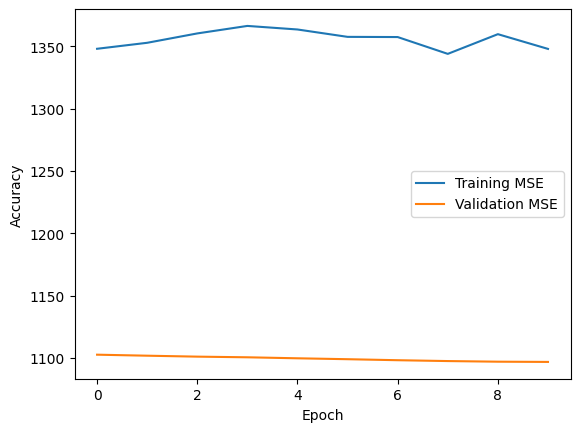

3/3 [==============================] - 0s 5ms/step


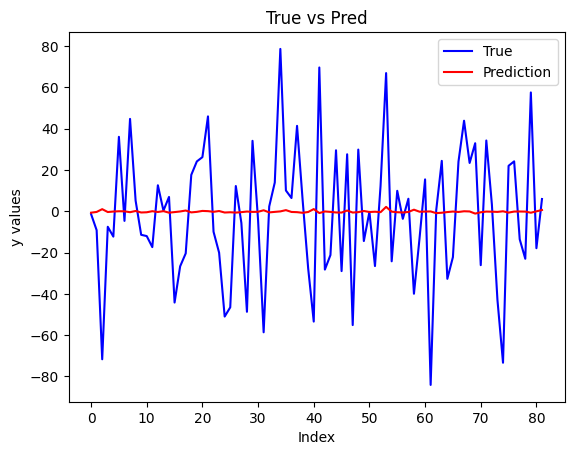

MSE: 1094.5058942659884, MAE: 26.212512237150683, R2: -0.00674330398257128
Epoch 1/10
9/9 [==============================] - 1s 36ms/step - loss: 1382.0209 - mae: 28.2955 - val_loss: 1188.0547 - val_mae: 26.4425
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1367.0848 - mae: 28.0795 - val_loss: 1187.1351 - val_mae: 26.4208
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 1382.2504 - mae: 28.1448 - val_loss: 1186.2639 - val_mae: 26.4000
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 1380.7745 - mae: 28.1904 - val_loss: 1185.6436 - val_mae: 26.3870
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 1369.1665 - mae: 28.0747 - val_loss: 1185.0885 - val_mae: 26.3753
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1378.8003 - mae: 28.2042 - val_loss: 1184.4404 - val_mae: 26.3614
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1388.1749 - mae: 28.2093 - val_l

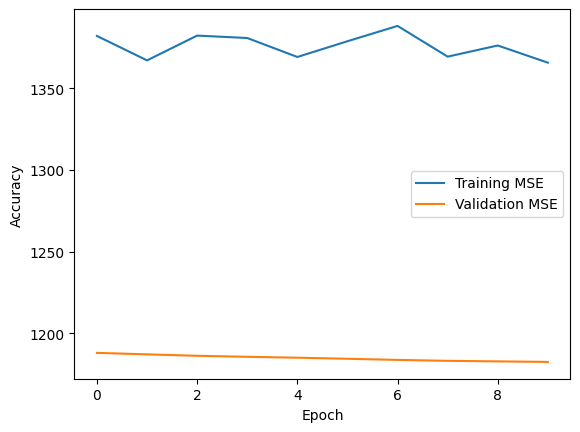

3/3 [==============================] - 0s 3ms/step


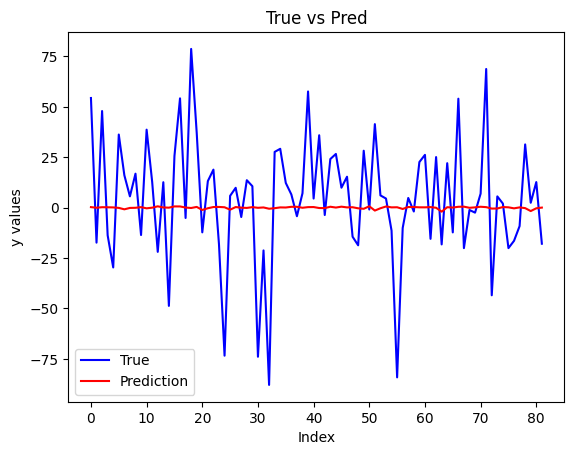

MSE: 960.7515921957196, MAE: 23.1400804635453, R2: -0.018756350279996115
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1346.6818 - mae: 27.2104 - val_loss: 855.9863 - val_mae: 22.7020
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1336.0574 - mae: 27.0745 - val_loss: 855.5380 - val_mae: 22.6814
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1320.7775 - mae: 27.0075 - val_loss: 855.1849 - val_mae: 22.6639
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1325.0503 - mae: 27.1217 - val_loss: 854.7839 - val_mae: 22.6417
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1326.7651 - mae: 27.0914 - val_loss: 854.4656 - val_mae: 22.6227
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1322.3496 - mae: 26.9976 - val_loss: 854.0993 - val_mae: 22.6042
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 1328.6289 - mae: 26.9002 - val_loss: 853.7472 

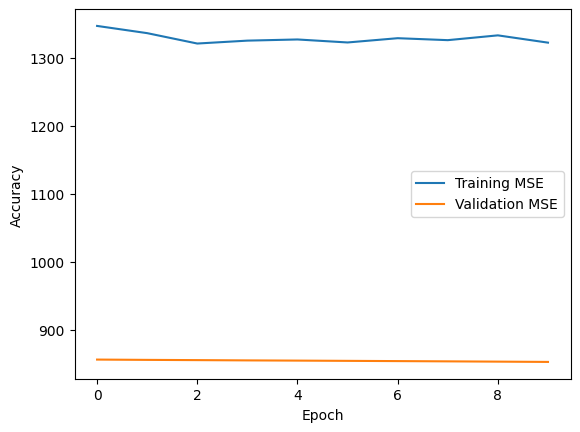

3/3 [==============================] - 0s 5ms/step


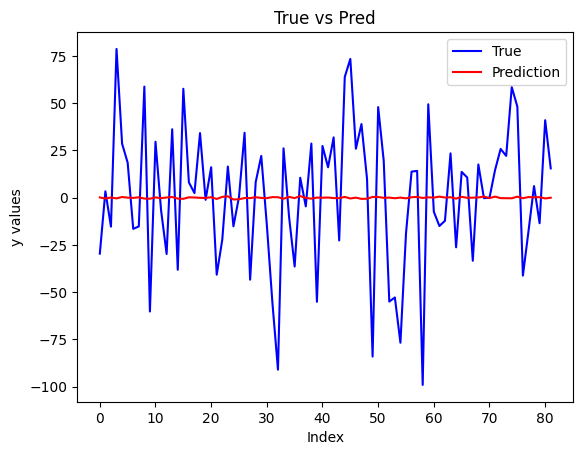

MSE: 1377.4917233288081, MAE: 29.586028230617014, R2: -0.0010237703264532882
Epoch 1/10
9/9 [==============================] - 1s 28ms/step - loss: 1115.5388 - mae: 25.8481 - val_loss: 1327.9110 - val_mae: 27.7397
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1109.0699 - mae: 25.6556 - val_loss: 1327.2045 - val_mae: 27.7210
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 1107.6318 - mae: 25.7277 - val_loss: 1326.1698 - val_mae: 27.6924
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 1112.5161 - mae: 25.6708 - val_loss: 1325.1327 - val_mae: 27.6624
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 1108.1591 - mae: 25.6825 - val_loss: 1324.3364 - val_mae: 27.6399
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1103.4344 - mae: 25.5964 - val_loss: 1323.7399 - val_mae: 27.6219
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 1100.8652 - mae: 25.5976 - val_los

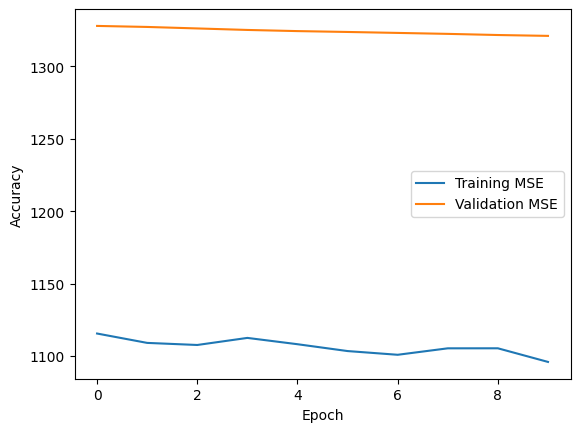

3/3 [==============================] - 0s 5ms/step


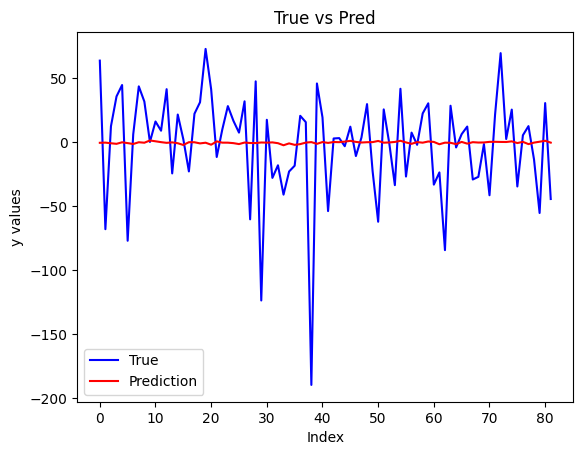

MSE: 1713.7731552724802, MAE: 30.135329576793804, R2: -0.003188506621910392
Epoch 1/10
9/9 [==============================] - 1s 28ms/step - loss: 1105.5859 - mae: 25.0491 - val_loss: 1581.4653 - val_mae: 31.1503
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1097.8951 - mae: 24.9990 - val_loss: 1581.0453 - val_mae: 31.1347
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1108.5260 - mae: 25.1014 - val_loss: 1580.7833 - val_mae: 31.1246
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 1104.4565 - mae: 25.0755 - val_loss: 1580.4390 - val_mae: 31.1121
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1104.6836 - mae: 25.0501 - val_loss: 1580.0458 - val_mae: 31.0991
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1097.4648 - mae: 24.9535 - val_loss: 1579.7831 - val_mae: 31.0905
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1098.5787 - mae: 24.8809 - val_los

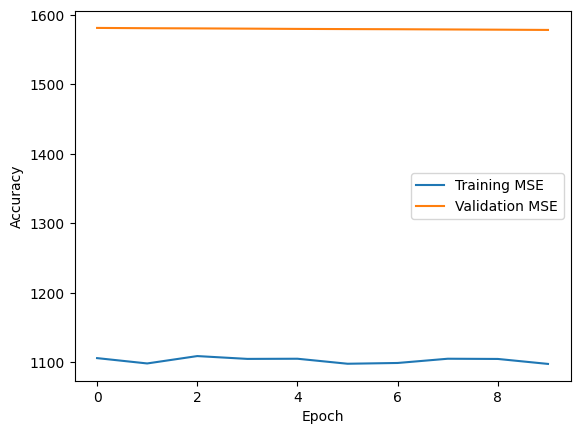

3/3 [==============================] - 0s 8ms/step


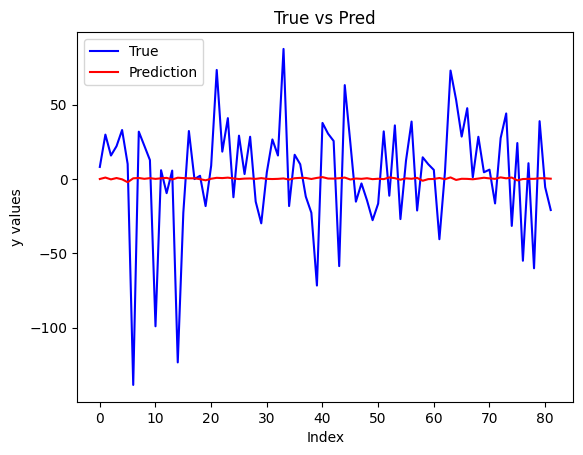

MSE: 1483.0501363071514, MAE: 28.501651365343882, R2: -0.008129581093176297
Epoch 1/10
9/9 [==============================] - 1s 30ms/step - loss: 1320.9631 - mae: 27.0119 - val_loss: 1013.1230 - val_mae: 24.2819
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 1331.4540 - mae: 27.0506 - val_loss: 1013.1469 - val_mae: 24.2828
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1319.6627 - mae: 27.0028 - val_loss: 1013.3719 - val_mae: 24.2880
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 1329.9258 - mae: 27.1089 - val_loss: 1013.3740 - val_mae: 24.2879
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 1329.9247 - mae: 27.1535 - val_loss: 1013.3822 - val_mae: 24.2884
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 1320.3809 - mae: 27.0516 - val_loss: 1013.6915 - val_mae: 24.2968
Epoch 7/10
9/9 [==============================] - 0s 19ms/step - loss: 1324.4208 - mae: 27.0322 - val_

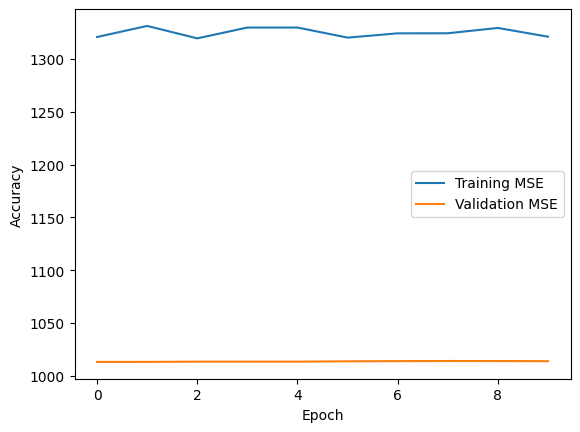

3/3 [==============================] - 0s 4ms/step


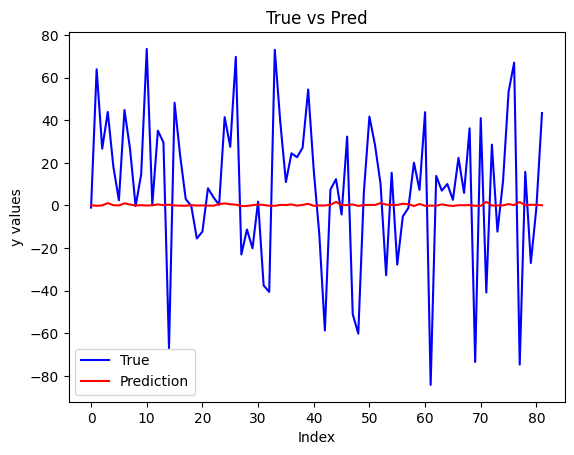

MSE: 1239.4602975412186, MAE: 27.404351218428534, R2: -0.05281470113347608
Epoch 1/10
9/9 [==============================] - 3s 29ms/step - loss: 1238.1981 - mae: 26.6882 - val_loss: 1000.2412 - val_mae: 25.8601
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 1246.6012 - mae: 26.7360 - val_loss: 1000.1314 - val_mae: 25.8591
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 1243.1176 - mae: 26.8032 - val_loss: 1000.0156 - val_mae: 25.8581
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1248.7628 - mae: 26.6840 - val_loss: 1000.0367 - val_mae: 25.8589
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1244.4154 - mae: 26.6150 - val_loss: 1000.1434 - val_mae: 25.8607
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1245.0419 - mae: 26.7099 - val_loss: 1000.1579 - val_mae: 25.8613
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1241.9999 - mae: 26.6422 - val_loss

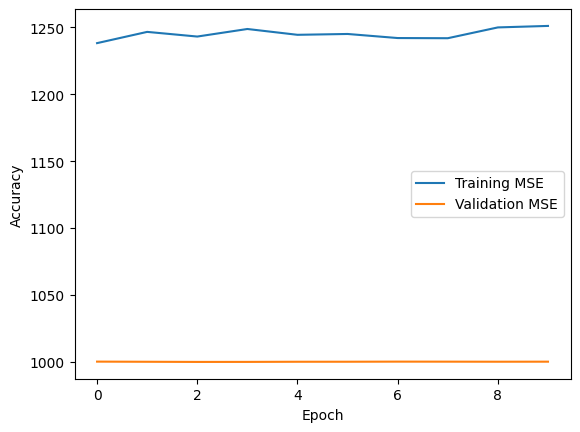

3/3 [==============================] - 0s 5ms/step


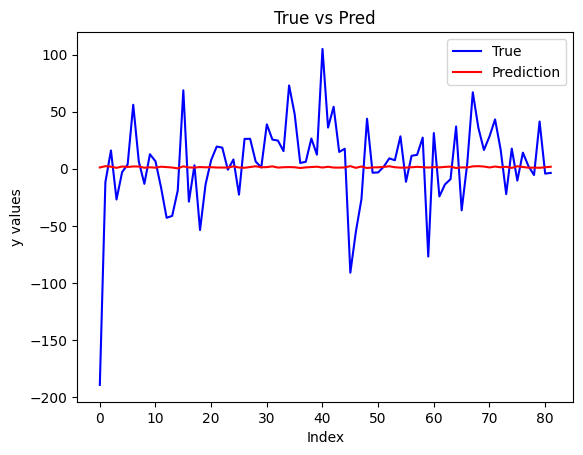

MSE: 1473.69206269692, MAE: 26.06231914108022, R2: -0.007230416191170486
The average RMSE is 36.36735094971702


In [45]:
# Test the performance of the model using 10 different random splits of training and test set of MEF monthly data
list_RMSE1=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mef, y_mef, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history = train_neural_network(X_train, y_train)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'MSE: {MSE}, MAE: {MAE}, R2: {R2}')
  list_RMSE1.append(MSE**(1/2))
avg_RMSE1=np.mean(list_RMSE1)
print('The average RMSE is', avg_RMSE1)

Epoch 1/10
9/9 [==============================] - 1s 27ms/step - loss: 1255.0723 - mae: 27.0927 - val_loss: 1769.7847 - val_mae: 28.6748
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1245.5909 - mae: 26.9565 - val_loss: 1770.1033 - val_mae: 28.6757
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1242.9115 - mae: 26.9246 - val_loss: 1770.5280 - val_mae: 28.6770
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1249.3789 - mae: 26.9938 - val_loss: 1770.9318 - val_mae: 28.6782
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 1255.8398 - mae: 27.0195 - val_loss: 1771.2655 - val_mae: 28.6804
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1237.8010 - mae: 26.8113 - val_loss: 1771.3722 - val_mae: 28.6817
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1255.8241 - mae: 26.9633 - val_loss: 1771.5437 - val_mae: 28.6838
Epoch 8/10
9/9 [==============================]

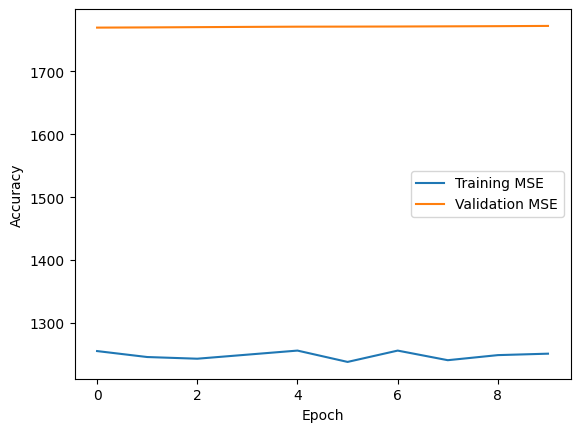

3/3 [==============================] - 0s 4ms/step


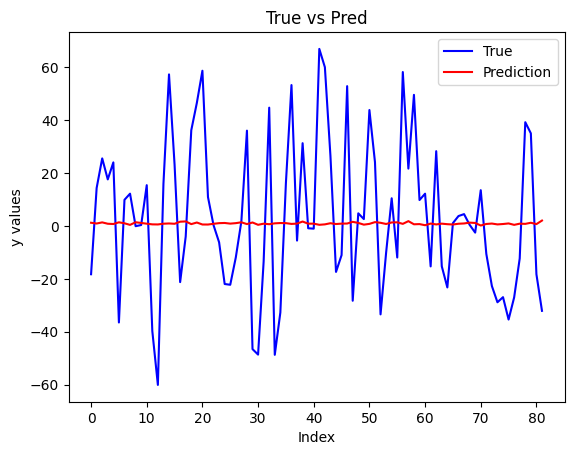

MSE: 866.9967564997024, MAE: 23.75365802866183, R2: -0.01237112547139474
Epoch 1/10
9/9 [==============================] - 1s 41ms/step - loss: 1314.8234 - mae: 26.4003 - val_loss: 870.8192 - val_mae: 24.1445
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 1323.8889 - mae: 26.5239 - val_loss: 870.7275 - val_mae: 24.1431
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1330.8127 - mae: 26.6676 - val_loss: 870.6927 - val_mae: 24.1429
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 1330.6378 - mae: 26.5370 - val_loss: 870.6548 - val_mae: 24.1426
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1317.7134 - mae: 26.3811 - val_loss: 870.6325 - val_mae: 24.1423
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 1325.1288 - mae: 26.4398 - val_loss: 870.6198 - val_mae: 24.1421
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1322.9113 - mae: 26.3689 - val_loss: 870

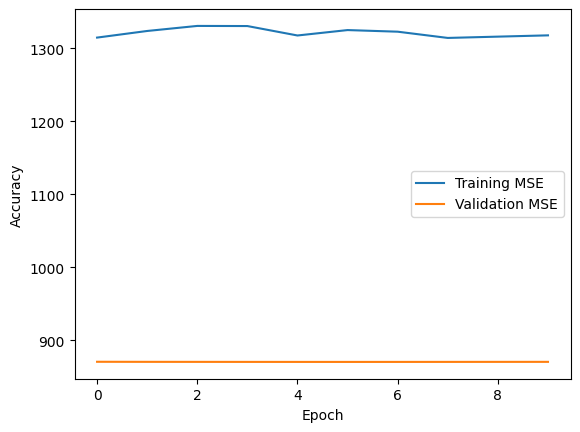

3/3 [==============================] - 0s 5ms/step


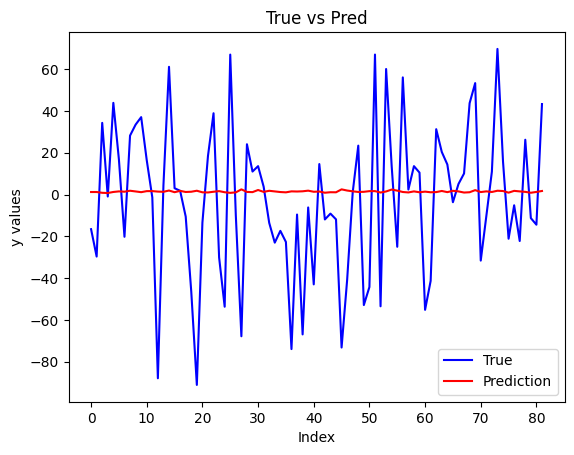

MSE: 1348.002003478827, MAE: 28.805733010033244, R2: -0.015434948415114835
Epoch 1/10
9/9 [==============================] - 1s 28ms/step - loss: 1043.7285 - mae: 24.2838 - val_loss: 1372.2485 - val_mae: 27.7756
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1046.0956 - mae: 24.3245 - val_loss: 1372.5151 - val_mae: 27.7646
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 1043.2598 - mae: 24.1968 - val_loss: 1372.7832 - val_mae: 27.7544
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1050.8076 - mae: 24.3376 - val_loss: 1373.1298 - val_mae: 27.7405
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1043.8820 - mae: 24.2816 - val_loss: 1373.5007 - val_mae: 27.7268
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1046.4286 - mae: 24.2834 - val_loss: 1373.7736 - val_mae: 27.7153
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1045.6304 - mae: 24.3261 - val_loss:

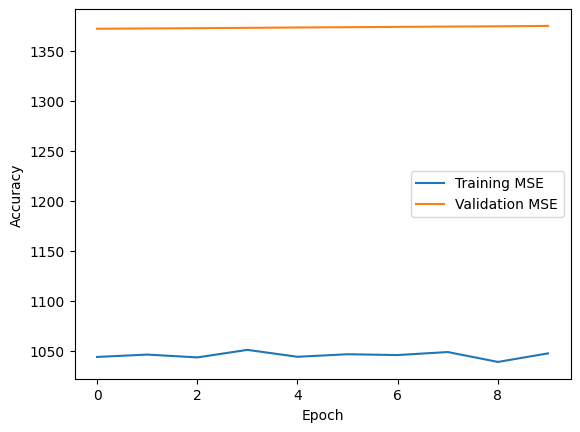

3/3 [==============================] - 0s 6ms/step


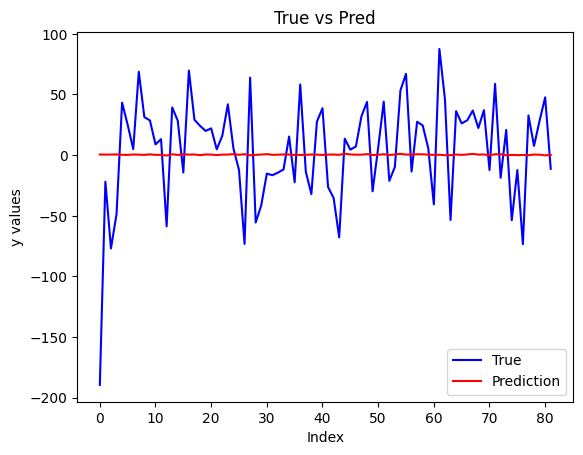

MSE: 1843.0002782322806, MAE: 33.688456610826854, R2: -0.008716968717873197
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1350.8989 - mae: 27.0562 - val_loss: 1097.4812 - val_mae: 26.2956
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1350.5468 - mae: 26.9297 - val_loss: 1096.7389 - val_mae: 26.2730
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1356.9614 - mae: 26.9991 - val_loss: 1096.1320 - val_mae: 26.2532
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 1343.7520 - mae: 26.9264 - val_loss: 1095.4929 - val_mae: 26.2323
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 1359.8965 - mae: 26.9972 - val_loss: 1094.7819 - val_mae: 26.2087
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1345.9570 - mae: 26.9520 - val_loss: 1094.0140 - val_mae: 26.1840
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 1345.7738 - mae: 26.9472 - val_loss: 

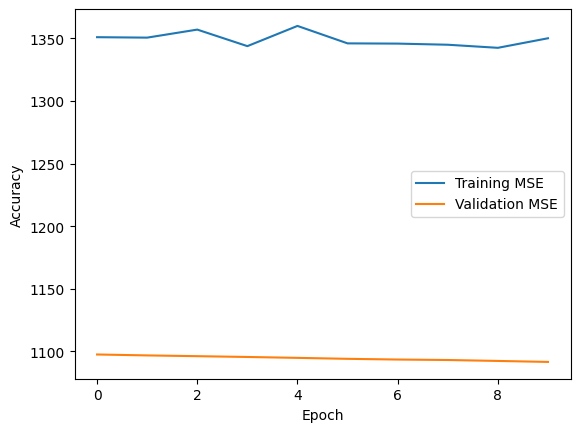

3/3 [==============================] - 0s 4ms/step


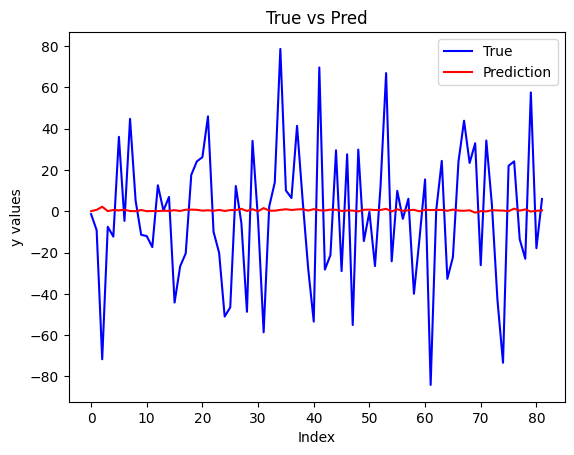

MSE: 1097.6364989834276, MAE: 26.19878122383005, R2: -0.009622882204314731
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1375.3148 - mae: 27.9094 - val_loss: 1176.2119 - val_mae: 26.1778
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 1375.7275 - mae: 27.8545 - val_loss: 1175.7493 - val_mae: 26.1677
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1370.5044 - mae: 27.9480 - val_loss: 1175.2069 - val_mae: 26.1559
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 1368.9590 - mae: 27.8248 - val_loss: 1174.7999 - val_mae: 26.1469
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 1374.4451 - mae: 27.7750 - val_loss: 1174.4000 - val_mae: 26.1383
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 1370.9154 - mae: 27.9277 - val_loss: 1174.1447 - val_mae: 26.1330
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 1370.7627 - mae: 27.9091 - val_loss:

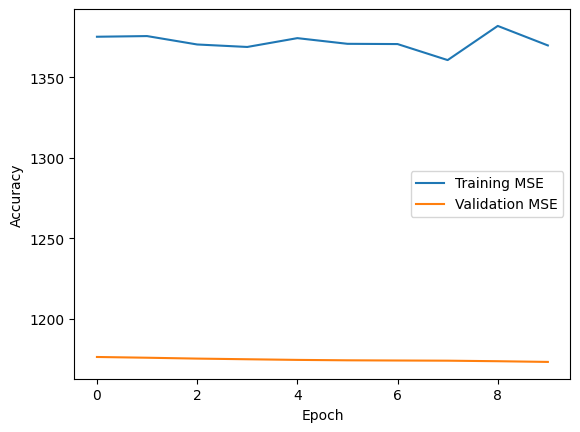

3/3 [==============================] - 0s 4ms/step


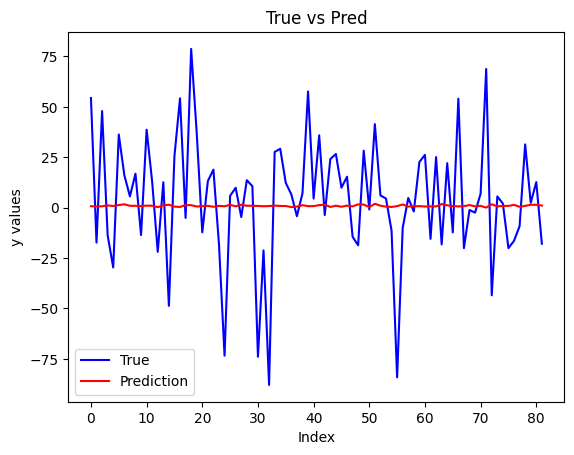

MSE: 957.4661978358274, MAE: 23.011550328030765, R2: -0.015272602353370246
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1330.5754 - mae: 27.0679 - val_loss: 846.4564 - val_mae: 22.6010
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1335.2649 - mae: 27.1082 - val_loss: 845.9517 - val_mae: 22.5762
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1325.4686 - mae: 26.9014 - val_loss: 845.6407 - val_mae: 22.5600
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1346.0416 - mae: 27.1154 - val_loss: 845.3682 - val_mae: 22.5453
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 1337.9242 - mae: 27.0158 - val_loss: 845.0755 - val_mae: 22.5299
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 1313.7889 - mae: 26.6710 - val_loss: 844.7849 - val_mae: 22.5146
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1329.0852 - mae: 26.8341 - val_loss: 844.56

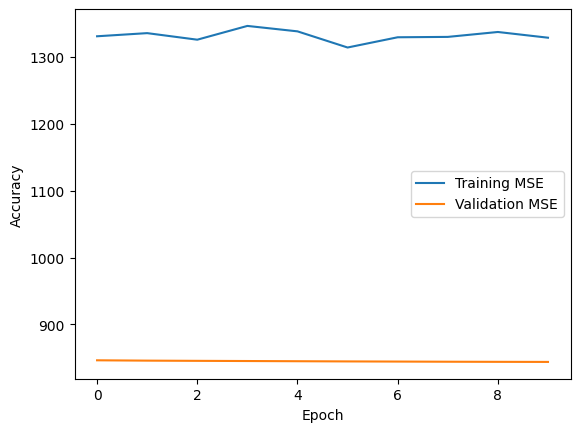

3/3 [==============================] - 0s 6ms/step


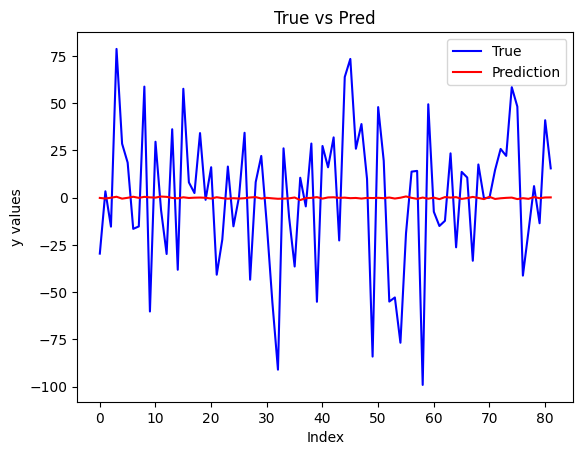

MSE: 1378.9494809479754, MAE: 29.696819608613833, R2: -0.0020831233544589267
Epoch 1/10
9/9 [==============================] - 2s 39ms/step - loss: 1095.1345 - mae: 25.3779 - val_loss: 1325.4547 - val_mae: 27.3911
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 1083.8116 - mae: 25.2399 - val_loss: 1325.3871 - val_mae: 27.3845
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 1092.0862 - mae: 25.2909 - val_loss: 1325.2312 - val_mae: 27.3727
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 1095.6085 - mae: 25.3229 - val_loss: 1325.0958 - val_mae: 27.3638
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 1088.0096 - mae: 25.3233 - val_loss: 1324.9421 - val_mae: 27.3547
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 1089.5996 - mae: 25.2880 - val_loss: 1324.7543 - val_mae: 27.3409
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 1089.0308 - mae: 25.2889 - val

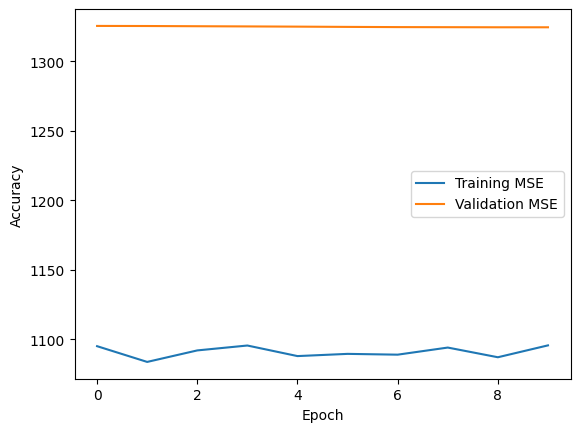

3/3 [==============================] - 0s 5ms/step


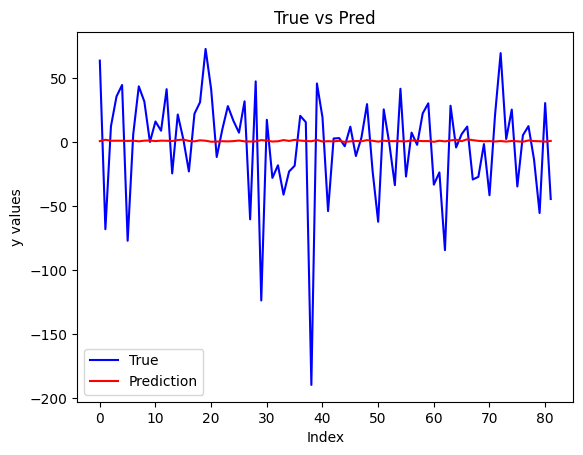

MSE: 1716.2674672549545, MAE: 29.869985917225044, R2: -0.004648597827709322
Epoch 1/10
9/9 [==============================] - 1s 26ms/step - loss: 1103.2141 - mae: 25.0359 - val_loss: 1586.6478 - val_mae: 31.1548
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1096.2775 - mae: 24.9933 - val_loss: 1586.4723 - val_mae: 31.1495
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 1098.5916 - mae: 24.9132 - val_loss: 1586.1338 - val_mae: 31.1399
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1095.9541 - mae: 24.8415 - val_loss: 1585.7770 - val_mae: 31.1317
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 1101.1183 - mae: 24.9237 - val_loss: 1585.4805 - val_mae: 31.1263
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1103.7070 - mae: 25.0469 - val_loss: 1585.4066 - val_mae: 31.1251
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 1102.7213 - mae: 25.0461 - val_loss:

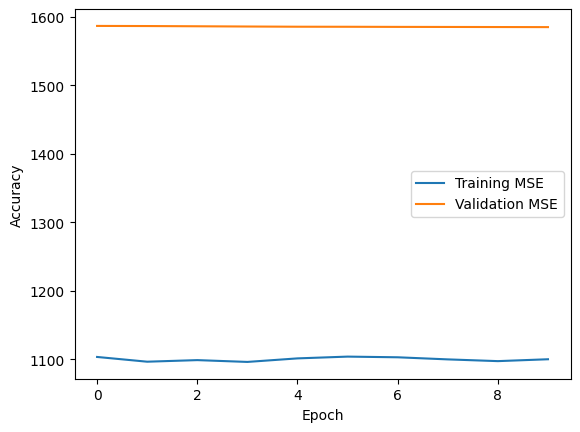

3/3 [==============================] - 0s 4ms/step


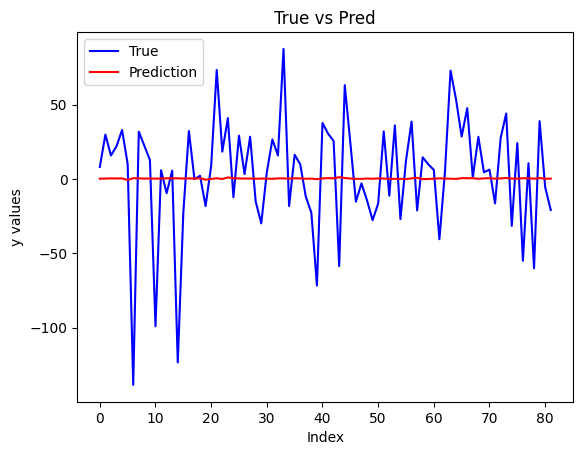

MSE: 1481.6892015244714, MAE: 28.415404948224054, R2: -0.007204461585231137
Epoch 1/10
9/9 [==============================] - 1s 29ms/step - loss: 1339.0419 - mae: 27.3658 - val_loss: 1027.7544 - val_mae: 24.7593
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1337.2651 - mae: 27.3946 - val_loss: 1027.2841 - val_mae: 24.7477
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 1321.7654 - mae: 27.3738 - val_loss: 1026.6450 - val_mae: 24.7319
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1327.2810 - mae: 27.3686 - val_loss: 1025.8658 - val_mae: 24.7127
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1327.7866 - mae: 27.2844 - val_loss: 1025.2095 - val_mae: 24.6967
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 1330.1748 - mae: 27.1659 - val_loss: 1024.7117 - val_mae: 24.6841
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 1315.2924 - mae: 27.0972 - val_loss

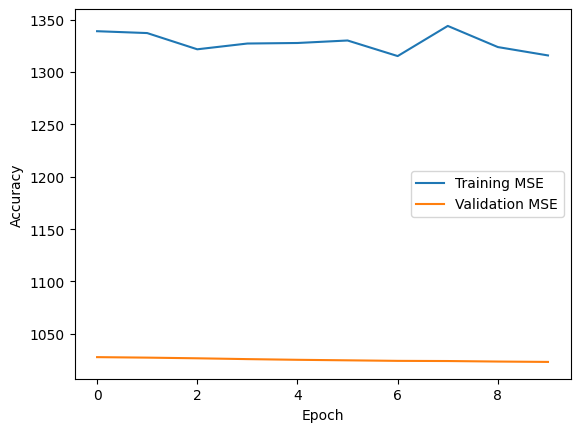

3/3 [==============================] - 0s 5ms/step


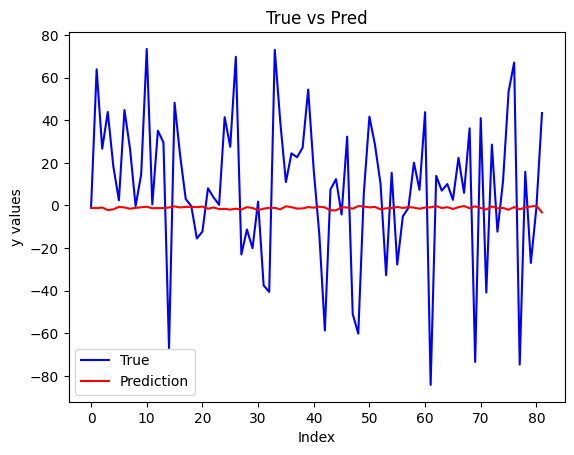

MSE: 1266.862340765928, MAE: 28.00299896244342, R2: -0.07609037523558237
Epoch 1/10
9/9 [==============================] - 1s 27ms/step - loss: 1257.2415 - mae: 26.7608 - val_loss: 989.0133 - val_mae: 25.7316
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 1254.2467 - mae: 26.7335 - val_loss: 989.3295 - val_mae: 25.7365
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 1250.5382 - mae: 26.7740 - val_loss: 989.5219 - val_mae: 25.7397
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 1259.0403 - mae: 26.7977 - val_loss: 989.6497 - val_mae: 25.7418
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 1260.5558 - mae: 26.9354 - val_loss: 989.7615 - val_mae: 25.7436
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 1241.0624 - mae: 26.6414 - val_loss: 990.0677 - val_mae: 25.7483
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 1257.1112 - mae: 26.9285 - val_loss: 990.399

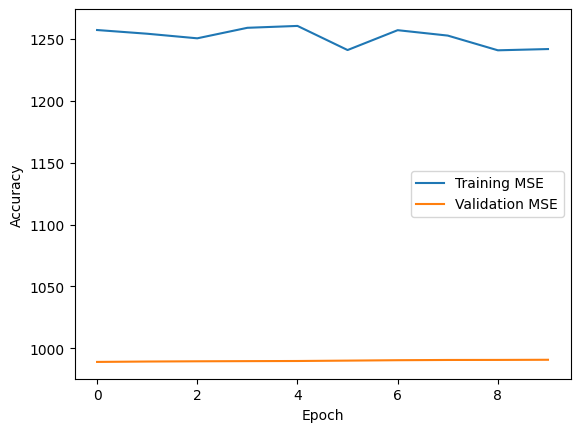

3/3 [==============================] - 0s 4ms/step


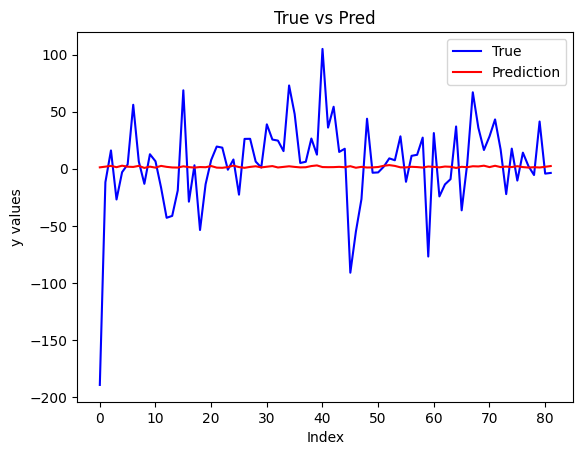

MSE: 1470.9184372547359, MAE: 25.96832535525136, R2: -0.005334714925482098
The average RMSE is 36.41640309332527


In [46]:
# Test the performance of the model using 10 different random splits of training and test set of MAI daily data
list_RMSE2=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mai_d, y_mai_d, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history = train_neural_network(X_train, y_train)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'MSE: {MSE}, MAE: {MAE}, R2: {R2}')
  list_RMSE2.append(MSE**(1/2))
avg_RMSE2=np.mean(list_RMSE2)
print('The average RMSE is', avg_RMSE2)